In [43]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
#Importing dataset
dataset = pd.read_csv('../datasets/Social_Network_Ads.csv')
X = dataset.iloc[ : , [2,3]].values
y = dataset.iloc[ : , 4].values

In [45]:
#Splitting the dataset into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [46]:
#Feature scaling for X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [48]:
#Predicting the test set results
y_pred = classifier.predict(X_test)

In [49]:
#Evaluating the prediction
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

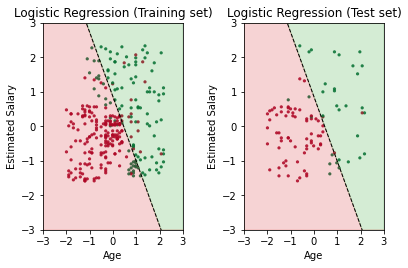

In [50]:
#Visualizing the results

b = classifier.intercept_[0]
w1,w2 = classifier.coef_.T
c = -b/w2
m = -w1/w2

ymin, ymax = -3, 3
xmin, xmax = -3, 3

xd = np.array([xmin, xmax])
yd = m*xd + c

#import seaborn as sns
fit, (ax1, ax2) = plt.subplots(1, 2)
fit.tight_layout(pad=3) 
#training
ax1.title.set_text('Logistic Regression (Training set)')
# ax1.imshow(cm)
ax1.grid(False)
ax1.set_xlabel('Age', color='black')
ax1.set_ylabel('Estimated Salary', color='black')
ax1.xaxis.set(ticks=range(-3,4))
ax1.yaxis.set(ticks=range(-3,4))
ax1.set_ylim(ymin, ymax)
ax1.set_xlim(xmin, xmax)
ax1.scatter(X_train[:,0], X_train[:,1], c = y_train, cmap='RdYlGn', s=5, alpha=0.8) #, color = 'red')
ax1.plot(xd, yd, 'k', lw=1, ls='--')
ax1.fill_between(xd, yd, ymin, color='tab:red', alpha=0.2)
ax1.fill_between(xd, yd, ymax, color='tab:green', alpha=0.2)

#testing
ax2.title.set_text('Logistic Regression (Test set)')
# ax2.imshow(cm)
ax2.grid(False)
ax2.set_xlabel('Age', color='black')
ax2.set_ylabel('Estimated Salary', color='black')
ax2.xaxis.set(ticks=range(-3,4))
ax2.yaxis.set(ticks=range(-3,4))
ax2.set_ylim(ymin, ymax)
ax2.set_xlim(xmin, xmax)
ax2.scatter(X_test[:,0], X_test[:,1], c = y_test, cmap='RdYlGn', s=5, alpha=0.8) #, color = 'red')
ax2.plot(xd, yd, 'k', lw=1, ls='--')
ax2.fill_between(xd, yd, ymin, color='tab:red', alpha=0.2)
ax2.fill_between(xd, yd, ymax, color='tab:green', alpha=0.2)
